# TVA sur les biens alimentaires

In [1]:
%matplotlib inline

from __future__ import division

import matplotlib.pyplot as plt
import pandas as pd
import qgrid
import seaborn as sns

from openfisca_france_indirect_taxation.examples.aliss.utils import (
    build_scenarios, run_reform, get_reform, set_adjustable_reform
    )

qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folder
pd.set_option('precision', 3)

## Scénarios et réforme pré-programmées

La fonction `build_scenarios` permet de créer les scénarios, avec et sans réaction comportementale, pour une réforme donnée parmi les réformes suivantes:
 - aliss_environnement
 - aliss_tva_sociale 
 - aliss_mixte
 - aliss_sante
 
 

In [2]:
scenario, adjusted_scenario = build_scenarios(reform_key = 'aliss_tva_sociale')

/home/etalab/openfisca/openfisca-france-indirect-taxation/openfisca_france_indirect_taxation/build_survey_data/calibration_aliss.py:119: FutureWarning: eval expressions containing an assignment currentlydefault to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  input_data_frame.eval("age = 0 + (agepr > 30) + (agepr > 45) + (agepr > 60)",
/home/etalab/openfisca/openfisca-survey-manager/openfisca_survey_manager/statshelpers.py:122: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  ret[and_(data >= lower, data < upper)] = labels[i]


Il est alors possible de calculer des agrégats pour la simulation de référence (avant réforme)

In [3]:
scenario.compute_aggregate('tva_taux_reduit', use_baseline =True) / 1e9

7.0690489222869628

 ainsi que pour la simulation tenant compte de la réforme _sans réaction comportementale_ (par recalage)

In [4]:
scenario.compute_aggregate('tva_taux_reduit') / 1e9

1.3746810023173108

et enfin pour la simulation tenant compte de la réforme _avec réaction comportementale_ (par recalage)

In [5]:
adjusted_scenario.compute_aggregate('tva_taux_reduit') / 1e9

1.3507768595914442

Il est également possible de réaliser des ventilations des agrégats selon les mêmes modalités

In [6]:
scenario.compute_pivot_table(values = ['tva_taux_reduit'], columns = ['niveau_vie_decile'], use_baseline =True)

niveau_vie_decile,1,2,3,4,5,6,7,8,9,10
tva_taux_reduit,165.85,174.051,195.222,213.531,222.098,240.131,260.344,279.117,315.122,413.624


In [7]:
scenario.compute_pivot_table(values = ['tva_taux_reduit'], columns = ['niveau_vie_decile'])

niveau_vie_decile,1,2,3,4,5,6,7,8,9,10
tva_taux_reduit,26.847,21.528,26.069,31.585,33.333,36.631,45.318,53.3,71.364,136.159


In [8]:
adjusted_scenario.compute_pivot_table(values = ['tva_taux_reduit'], columns = ['niveau_vie_decile'])

niveau_vie_decile,1,2,3,4,5,6,7,8,9,10
tva_taux_reduit,27.724,21.848,26.527,31.896,33.424,36.949,45.611,54.342,71.907,136.034


## Scénarios et réforme ajustable

Il est possibe de récupérer les spécifications d'une réforme pré-programmée en fonction des biens alimentaires répertoriés selon la nomenclature F

In [9]:
reform_dataframe = get_reform(reform_key = 'sante')  # reform_key doit être une réforme pré-programmée
reform_dataframe

,ajustable
nomf,
1 : Juices,tva_taux_reduit
3 : Soft drinks,tva_taux_plein
6 : Fresh fruits and vegetables,tva_taux_reduit
7 : Spices,tva_taux_intermediaire
8 : Plant-based foods high in fats,tva_taux_plein
9 : Plant-based dishes,tva_taux_reduit
10 : Plant-based foods high in sugar,tva_taux_plein
11 : Starchy foods,tva_taux_intermediaire
12 : Processed fruits and vegetables,tva_taux_intermediaire


Il est alors possible d'utiliser cette `reform_dataframe` comme base pour la réforme ajustable

In [10]:
reform_dataframe.loc[['19 : Dairy products', '20 : Prepared mixed meals']] = 'tva_taux_plein'
set_adjustable_reform(reform_dataframe)
get_reform()  # On vérifie que la réforme ajustable a bien été modifiée

Index([u'1 : Juices', u'3 : Soft drinks', u'6 : Fresh fruits and vegetables',
       u'7 : Spices', u'8 : Plant-based foods high in fats',
       u'9 : Plant-based dishes', u'10 : Plant-based foods high in sugar',
       u'11 : Starchy foods', u'12 : Processed fruits and vegetables',
       u'13 : Beef', u'14 : Other meats', u'15 : Cooked meats',
       u'16 : Animal-based foods high in fats', u'17 : Cheese',
       u'18 : Fish and seafoods', u'19 : Dairy products',
       u'20 : Prepared mixed meals', u'21 : Prepared desserts'],
      dtype='object', name=u'nomf') Index([u'1 : Juices', u'3 : Soft drinks', u'6 : Fresh fruits and vegetables',
       u'7 : Spices', u'8 : Plant-based foods high in fats',
       u'9 : Plant-based dishes', u'10 : Plant-based foods high in sugar',
       u'11 : Starchy foods', u'12 : Processed fruits and vegetables',
       u'13 : Beef', u'14 : Other meats', u'15 : Cooked meats',
       u'16 : Animal-based foods high in fats', u'17 : Cheese',
       u'18 : F

,ajustable
nomf,
1 : Juices,tva_taux_reduit
3 : Soft drinks,tva_taux_plein
6 : Fresh fruits and vegetables,tva_taux_reduit
7 : Spices,tva_taux_intermediaire
8 : Plant-based foods high in fats,tva_taux_plein
9 : Plant-based dishes,tva_taux_reduit
10 : Plant-based foods high in sugar,tva_taux_plein
11 : Starchy foods,tva_taux_intermediaire
12 : Processed fruits and vegetables,tva_taux_intermediaire


Il est alors possible de procéder comme précédemment

In [11]:
scenario, adjusted_scenario = build_scenarios(reform_key = 'aliss_ajustable')

##  Construction de tables d'agrégats (long)

In [13]:
data_by_reform_key = dict()
for reform_key in ['aliss_tva_sociale', 'aliss_environnement', 'aliss_mixte', 'aliss_sante']:
    aggregates, pivot_table = run_reform(reform_key = reform_key)
    data_by_reform_key[reform_key] = dict(aggregates = aggregates, pivot_table = pivot_table)


In [14]:
reform_key = 'aliss_tva_sociale'
aggregates = data_by_reform_key[reform_key]['aggregates']
aggregates.loc[
    [index for index in aggregates.index if index.startswith('tva_') or index.startswith('poste_agrege')]
    ]

,adjusted,reference,reform,reform - reference,adjusted - reform,adjusted - reference
poste_agrege_01,124.137,124.140,128.399,4.259e+00,-4.262,-0.003
poste_agrege_02,22.156,22.431,22.431,2.735e-08,-0.275,-0.275
tva_taux_intermediaire,17.787,7.559,18.313,1.075e+01,-0.526,10.228
tva_taux_plein,61.076,63.155,62.354,-8.009e-01,-1.277,-2.078
tva_taux_reduit,1.351,7.069,1.375,-5.694e+00,-0.024,-5.718
tva_taux_super_reduit,0.139,0.141,0.141,0.000e+00,-0.002,-0.002
tva_total,80.353,77.924,82.183,4.259e+00,-1.830,2.429


In [15]:
aggregates

,adjusted,reference,reform,reform - reference,adjusted - reform,adjusted - reference
depenses_alcools_forts,2.923,2.932,2.932,0.000e+00,-9.112e-03,-9.112e-03
depenses_biere,1.160,1.301,1.301,0.000e+00,-1.415e-01,-1.415e-01
depenses_ht_poste_01_10_1,2.868,2.924,2.924,0.000e+00,-5.583e-02,-5.583e-02
depenses_ht_poste_01_10_2,1.401,1.427,1.427,0.000e+00,-2.533e-02,-2.533e-02
depenses_ht_poste_01_1_1_1_1,12.905,13.376,13.376,0.000e+00,-4.715e-01,-4.715e-01
depenses_ht_poste_01_1_1_3_3,3.602,3.730,3.730,0.000e+00,-1.272e-01,-1.272e-01
depenses_ht_poste_01_1_1_4_1,1.422,1.488,1.488,0.000e+00,-6.553e-02,-6.553e-02
depenses_ht_poste_01_1_1_4_2,1.546,1.615,1.615,0.000e+00,-6.980e-02,-6.980e-02
depenses_ht_poste_01_1_1_4_3,0.742,0.851,0.851,0.000e+00,-1.089e-01,-1.089e-01
depenses_ht_poste_01_1_2_1_1,7.124,7.457,7.457,0.000e+00,-3.330e-01,-3.330e-01


In [16]:
aggregates = data_by_reform_key[reform_key]['pivot_table']
variables = [variable for variable in pivot_table.variable.unique() if variable.startswith('poste_agrege')]
data = pivot_table.query('variable in @variables')
data = pivot_table.set_index(['simulation', 'variable']).sort_index()
data.head()

niveau_vie_decile                             1        2        3        4   \
simulation variable                                                           
adjusted   depenses_alcools_forts         58.908   74.288  114.283   97.373   
           depenses_biere                 24.536   24.390   29.802   40.885   
           depenses_ht_poste_01_10_1      61.937   49.502   63.844   84.465   
           depenses_ht_poste_01_10_2      32.135   27.995   28.364   24.543   
           depenses_ht_poste_01_1_1_1_1  340.319  377.290  405.706  433.900   

niveau_vie_decile                             5        6        7        8   \
simulation variable                                                           
adjusted   depenses_alcools_forts        108.231  118.420  124.206  137.943   
           depenses_biere                 35.029   38.213   37.190   43.092   
           depenses_ht_poste_01_10_1      86.078   95.727  127.778  132.625   
           depenses_ht_poste_01_10_2      48.703   47.221   48.184   50.849   
           depenses_ht_poste_01_1_1_1_1  447.391  474.555  493.983  514.962   

niveau_vie_decile                             9        10  
simulation variable                                        
adjusted   depenses_alcools_forts        134.540  138.097  
           depenses_biere                 48.893   51.432  
           depenses_ht_poste_01_10_1     160.632  169.749  
           depenses_ht_poste_01_10_2      77.300  119.100  
           depenses_ht_poste_01_1_1_1_1  532.388  567.572

In [17]:
df = data.loc(axis=0)[(['adjusted-reference', 'reform-reference'], ['poste_agrege_01', 'tva_total'])]
df

niveau_vie_decile                        1        2        3        4   \
simulation         variable                                              
adjusted-reference poste_agrege_01  104.344  144.640  180.528  246.148   
                   tva_total         45.050   31.647   35.668   18.643   
reform-reference   poste_agrege_01  177.651  198.544  220.511  237.472   
                   tva_total         13.027   16.996   23.658   23.478   

niveau_vie_decile                        5        6        7        8   \
simulation         variable                                              
adjusted-reference poste_agrege_01  195.690  199.922  210.685  269.742   
                   tva_total         27.713   32.597   53.364   43.191   
reform-reference   poste_agrege_01  248.370  267.011  279.513  288.073   
                   tva_total         29.149   25.071   28.584   30.522   

niveau_vie_decile                        9        10  
simulation         variable                           
adjusted-reference poste_agrege_01  225.261  273.680  
                   tva_total         33.767   44.278  
reform-reference   poste_agrege_01  307.376  335.952  
                   tva_total         29.539   35.495

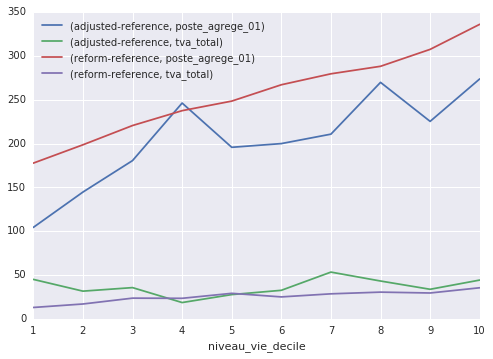

In [18]:
df.T.plot()
plt.legend(loc='upper left')
sns.despine()

In [19]:
qgrid.show_grid(pivot_table)